# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [94]:
# Implement here
url = 'https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv'
df = pd.read_csv(url, sep=",")
df=df.dropna()

print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>

<font color='red'>By plotting the density of the features, we can visually inspect their distributions. From the density plots, we observe that<br> the features approximately follow a Gaussian distribution (they are close to Gaussian, showing a bell-shaped curve).<br>
so yes the gaussian bayes work here </font>

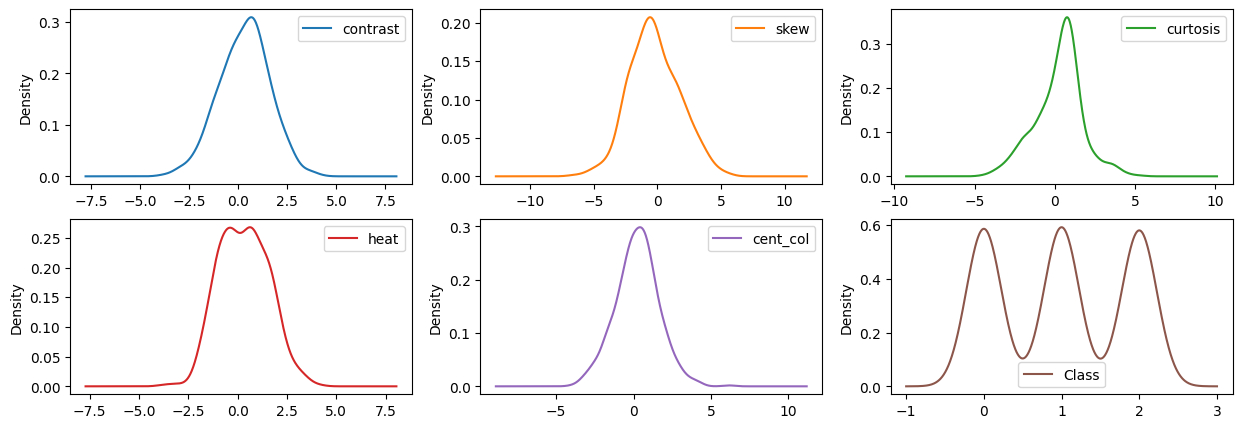

In [95]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [96]:
# Implement here
numpy_array = df.values
x = df.drop('Class', axis=1).values
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33,stratify=y)

y_test=y_test.to_numpy()

Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [97]:
def classify_point_gaussian_bayes(test_data, x_train_data, y_train_data):
    unique_classes = np.unique(y_train_data)
    class_means = np.array([np.mean(x_train_data[y_train_data == i], axis=0) for i in unique_classes])
    class_covs = [np.cov(x_train_data[y_train_data == i], rowvar=False) for i in unique_classes]
    class_priors = np.array([np.sum(y_train_data == i) / len(y_train_data) for i in unique_classes])
    c_num = len(unique_classes)
    
    inv_covs = [np.linalg.inv(cov + 1e-6 * np.eye(cov.shape[0])) for cov in class_covs]  # Added regularization term
    det_covs = [np.linalg.det(cov + 1e-6 * np.eye(cov.shape[0])) for cov in class_covs]  # Regularize determinant calculation
    #inv_covs = [np.linalg.inv(cov) for cov in class_covs]
    #det_covs = [np.linalg.det(cov) for cov in class_covs]
    
    ln_posteriors = []
    
    for i in range(c_num):
        diff = test_data - class_means[i]
        dist = np.einsum('ij,jk,ik->i', diff, inv_covs[i], diff)
        ln_posterior = -0.5 * dist - 0.5 * np.log(det_covs[i]) + np.log(class_priors[i])
        ln_posteriors.append(ln_posterior)
    
    ln_posteriors = np.array(ln_posteriors)
    preds = np.argmax(ln_posteriors, axis=0)
    
    return preds

def pdf(x, mean, std):
    e_power = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * e_power

def classify_point_gaussian_naive_bayes(test_data, x_train_data, y_train_data):
    unique_classes = np.unique(y_train_data)
    class_means = np.array([np.mean(x_train_data[y_train_data == i], axis=0) for i in unique_classes])
    class_stds = np.array([np.std(x_train_data[y_train_data == i], axis=0) for i in unique_classes])
    class_priors = np.array([np.sum(y_train_data == i) / len(y_train_data) for i in unique_classes])
    c_num = len(unique_classes)
    
    ln_posteriors = []
    
    for i in range(c_num):
        class_prob = np.sum(np.log(pdf(test_data, class_means[i], class_stds[i])), axis=1) + np.log(class_priors[i])
        ln_posteriors.append(class_prob)
    
    ln_posteriors = np.array(ln_posteriors)
    preds = np.argmax(ln_posteriors, axis=0)
    
    return preds



For both GB and GNB, we will look at train vs test. Answer the following:

- Which model achieved better learning? Why?<br>
<font color='red'>from the results below, The Gaussian Bayes (GB) model achieved better learning.<br>
 The GB model has higher accuracy on both the training and test sets compared to the GNB model.<br>
 This indicates that GB was better at capturing the underlying patterns in the data and performed consistently well on the test set.</font>

 - Could the other model be sometimes better? How, for example?<br>
 <font color='red'>yes, while GB performed better with the given data, GNB can be sometimes better in  certain situations. for example:<br>
 
     - Small Datasets: The GNB model might perform better on small datasets due to its simplicity and fewer parameters to estimate, <br> which reduces the risk of overfitting compared to more complex models like GB. For instance, in medical diagnostics with limited patient data, the GNB<br> model can provide robust predictions without overfitting to the noise in the dataset.

  </font>

In [98]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train, x_train, y_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test, x_train, y_train)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train, x_train, y_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test, x_train, y_train)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.850000
test   0.941667  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>Answer :</font> <br>
<font color='red'>
- Firstly, we generated the correlation matrix,<br> 
and we identified that feature 2 (index 1) and feature 5 (index 4) have a high negative correlation which is -0.91935381,<br>
so we decided to remove feature 5.<br>
removing it helps to reduce multicollinearity, which can improve the performance and interpretability of the model.
 </font>

 <font color='red'>

 - If we continue to remove features,the train error may increase because the model will have less information to learn from. <br>
 However, this can also reduce multicollinearity, which might improve the model's performance and generalization if done carefully.
 </font>


In [99]:
# Implement here. you may use the code from the tutorial.
# You can obtain the correlation matrix using numpy

correlation_matrix = np.corrcoef(x_train.T)
print(correlation_matrix)

# Remove feature 5 (index 4)
x_train_reduced = np.delete(x_train, 4, axis=1)
x_test_reduced = np.delete(x_test, 4, axis=1)


[[ 1.          0.46911339  0.2517404   0.39833881 -0.26523573]
 [ 0.46911339  1.         -0.56049324  0.26678033 -0.91935381]
 [ 0.2517404  -0.56049324  1.         -0.33079076  0.46451021]
 [ 0.39833881  0.26678033 -0.33079076  1.         -0.16310369]
 [-0.26523573 -0.91935381  0.46451021 -0.16310369  1.        ]]


Adjust the data according to your decision and print again the train and test for both models.

In [100]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train_reduced, x_train_reduced, y_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test_reduced, x_train_reduced, y_train)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train_reduced, x_train_reduced, y_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test_reduced, x_train_reduced, y_train)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [101]:
# Essential for the visualization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(10353, 5)


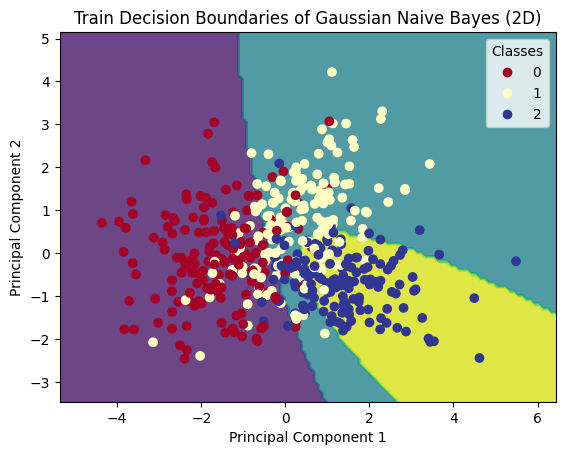

In [102]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points,x_train, y_train)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7524, 5)


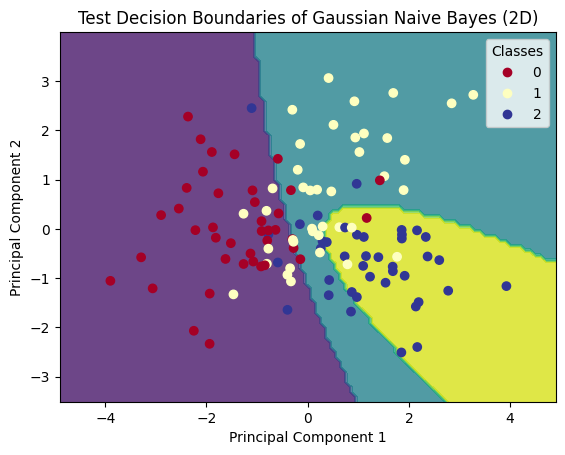

In [103]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points,x_train, y_train)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
import bisect

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [2]:
def readTrainData(file_name):
  # Read the CSV file
  df = pd.read_csv(file_name, sep=",")
    
  lbAll = df.iloc[:, 0].tolist()
  texAll = df.iloc[:, 1].apply(lambda x: x.split()).tolist()
    
  words = []
  for tw in texAll:
    for word in tw:
      words.append(word)
  
  voc = sorted(set(words))
  cat = sorted(set(lbAll)) 
    
  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [3]:
def learn_NB_text():
    global counter
    lap = 1
    voc_len = len(voc)
    
    def calculate_Pw():
        Pw = np.zeros((len(cat), len(voc)), dtype=float)
        for i in range(len(texAll_train)):
            index_class = bisect.bisect_left(cat, lblAll_train[i])
            for word in texAll_train[i]:
                index_word = bisect.bisect_left(voc, word)
                Pw[index_class, index_word] += 1
        return Pw

    def update_probabilities(Pw):
        class_number_of_words = np.sum(Pw, axis=1)
        for i in range(Pw.shape[0]):
            for j in range(Pw.shape[1]):
                Pw[i, j] = (Pw[i, j] + lap) / (class_number_of_words[i] + voc_len)
        return Pw

    def calculate_P():
        count_vectorized = CountVectorizer()
        X = np.sum(count_vectorized.fit_transform(lblAll_test), axis=0)
        total_counts = np.sum(X)
        probabilities = X / total_counts
        vocab = count_vectorized.get_feature_names_out()
        P = dict(zip(vocab, np.asarray(probabilities).flatten()))
        return P

    Pw = calculate_Pw()
    counter = np.sum(Pw, axis=1)
    Pw = update_probabilities(Pw)
    P = calculate_P()

    return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [4]:
def classify_text(text, pw, p, all_voc, all_cat, true_class):               
    prob = []
    global counter
    alpha = 1
    voc_size = len(voc)

    for class_index in range(len(p)):
        temp = 0
        for word in range(len(text)):
            word_index = bisect.bisect_left(all_voc, text[word])
            if word_index != len(all_voc) and all_voc[word_index] == text[word]:
                temp += math.log(pw[class_index, word_index])
            else:  
                res = alpha* voc_size+counter[class_index]
                temp += math.log(alpha/res)
        prob.append(math.exp(temp) * p[all_cat[class_index]]) 
        
    predicted_class = all_cat[np.argmax(prob)]
    return true_class == predicted_class

def ClassifyNB_text(Pw, P):
    accuracy = 0
    for i in range(len(texAll_test)):
        if classify_text(texAll_test[i], Pw, P, voc, cat, lblAll_test[i]):
            accuracy += 1
    return accuracy

Read the files

In [5]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [6]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right/len(texAll_test))

0.774


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [2]:
# Implement here
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url, sep=",")
df=df.dropna()
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [4]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>

<font color='red'>Based on the correlation matrix, it is clear that there are notable correlations between several pairs of features.<br> 
For instance, 'Color' and 'Spectral_Class' have a significant positive correlation (0.70), and 'Temperature' is correlated with 'Color' (0.54).<br>
There are also negative correlations, such as between 'A_M' and 'L' (-0.69).<br>
These correlations indicate that the features are not independent. Consequently, the Mahalanobis distance is more appropriate as it accounts<br> for the correlations between features. It provides more reliable and meaningful results compared to the Euclidean distance,<br> which assumes feature independence. Therefore, the Mahalanobis distance is the preferable choice for this dataset.
</font>

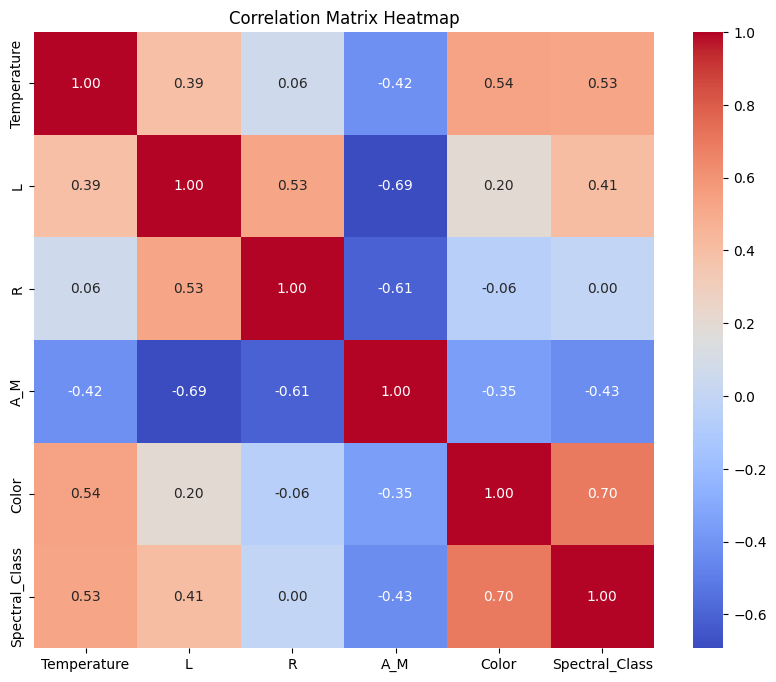

In [5]:
# Implement here
X = df.loc[:, df.columns != 'Type']
y = df['Type']

correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [6]:
# Implement here
X = df.drop('Type', axis=1).values 
y = df['Type']

# Split the data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y) 

# Split the train data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [7]:
def Euclidean(test, data):
  test_features = test.shape[1]
  distances = np.zeros((test.shape[0], data.shape[0]))

  for i in range(test.shape[0]):
    for j in range(data.shape[0]):
      distance = np.sqrt(np.sum((test[i] - data[j])**2))
      distances[i, j] = distance
  return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [8]:
def kNN_classify(data, labels, test, k, metric='Euclidean', p=2):
    if not isinstance(test, np.ndarray):
        test = test.to_numpy()
    if not isinstance(data, np.ndarray):
        data = data.to_numpy()
    if not isinstance(labels, np.ndarray):
        labels = labels.to_numpy()

    arguments = (test, data)
    if metric == 'Minkowski':
        distances = Minkowski(*arguments, p=p)
    else:
        distances = eval(f'{metric}(*arguments)')  # returns np[][] | test| X |data| by the given metric.

    y_test_arr = np.zeros(test.shape[0], dtype=labels.dtype)

    num_rows = distances.shape[0]
    indices = np.argpartition(distances, k, axis=1)[:, :k]  # the k smallest elements along each row of distances
    for i in range(num_rows):
        index = list(indices[i])
        minK_Label = labels[index]
        unique_labels, counts = np.unique(minK_Label, return_counts=True)
        pred = unique_labels[np.argmax(counts)]
        y_test_arr[i] = pred
    return y_test_arr


Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>

<font color='red'> Based on the plots, the Mahalanobis distance is better than Euclidean distance in terms of accuracy for different k values.<br> The Mahalanobis distance maintains a high accuracy for lower k values and shows a more stable performance with less fluctuation<br> compared to the Euclidean distance, which fluctuates significantly and drops in accuracy as k increases.<br> This indicates that the Mahalanobis distance is more reliable and better suited for this dataset, likely due to its ability to account for correlations between features. </font>

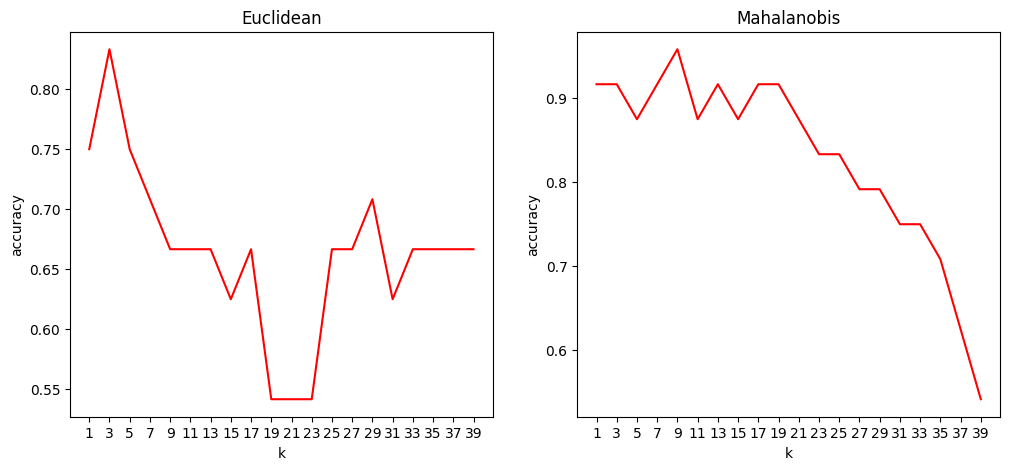

In [9]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append(accuracy_score(y_test, c)) 

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [12]:
def Minkowski(test, data, p):
    distances = np.zeros((test.shape[0], data.shape[0]))
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
            distances[i, j] = np.sum(np.abs(test[i] - data[j]) ** p) ** (1 / p)
    return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

In [14]:
# Implement here
def find_best_p(X_train, y_train, X_val, y_val, k, p_range=(1, 10)):
    best_p = None
    best_accuracy = 0
    
    for p in range(p_range[0], p_range[1] + 1):
        val_predictions = kNN_classify(X_train, y_train, X_val, k, metric='Minkowski', p=p)
        accuracy = accuracy_score(y_val, val_predictions)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_p = p
    
    return best_p, best_accuracy

best_p, best_accuracy = find_best_p(X_train, y_train, X_val, y_val, 5)
print(f'The best hyperparameter p is: {best_p}')

The best hyperparameter p is: 1


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>

<font color='red'>As we can see, the Minkowski distance with the best p is better than Euclidean and is generally not better than Mahalanobis.<br> We put the three distance metrics (Minkowski, Euclidean, and Mahalanobis) on the same plot and compared them, showing that Mahalanobis<br> consistently provides the highest accuracy across different values of k.</font>

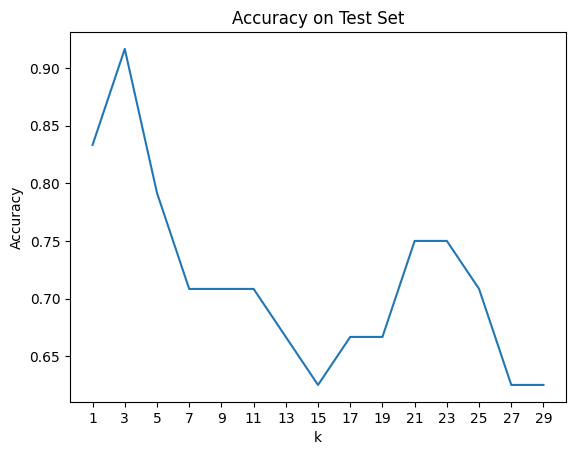

In [15]:
ks = np.arange(1, 30, 2)
accs = []
best_p = best_p 

for k in ks:
    test_predictions = kNN_classify(X_train, y_train, X_test, k, metric='Minkowski', p=best_p)
    accuracy = accuracy_score(y_test, test_predictions)
    accs.append(accuracy)

plt.plot(ks, accs)
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set')
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist_tarin_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv"
fashion_mnist_test_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv"

train_df = pd.read_csv(fashion_mnist_tarin_url)
test_df = pd.read_csv(fashion_mnist_test_url)
train_data = train_df.values
test_data = test_df.values
X_train = train_data[:, 1:]  
y_train = train_data[:, 0]  

X_test = test_data[:, 1:]    
y_test = test_data[:, 0]     

dispaly some random image

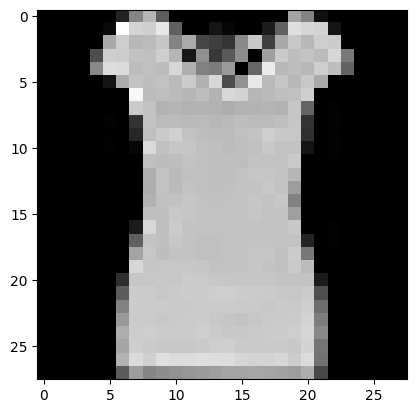

In [6]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>

<font color='red'>Based on my research, images can be tricky to classify due to variations in lighting and scale.<br> However, the Cosine Distance metric proves particularly adept at handling these challenges. By focusing on the direction of image<br> data rather than its overall size, it becomes highly suitable for images. This makes Cosine Distance a reliable<br> choice for image classification tasks, effectively managing variations that often complicate other distance metrics.

</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

<font color='red'>the choice of the Cosine Distance metric was correct. The implementation of the k-NN classifier using this metric achieved high accuracy across different k values,<br> with the best accuracy observed at 
k=5 (approximately 0.974). This confirms that the Cosine Distance is an effective and suitable metric for image classification tasks. </font>


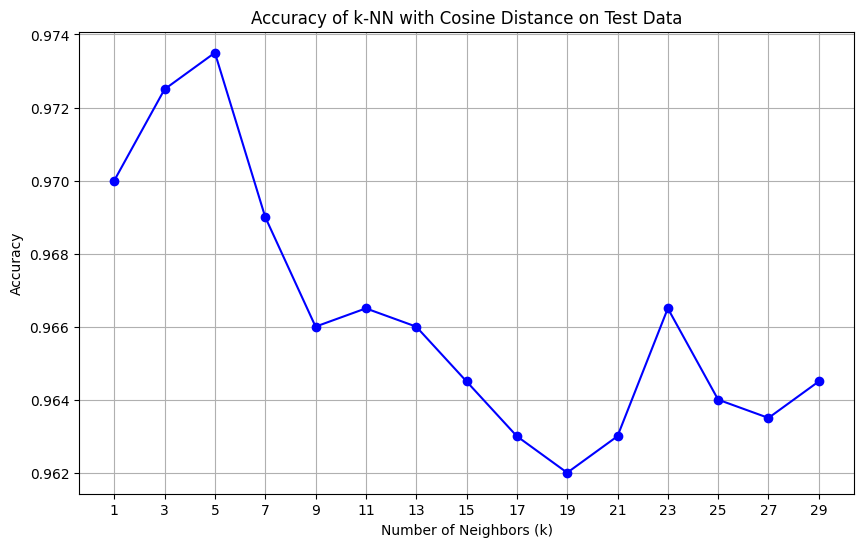

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = range(1, 30, 2)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy of k-NN with Cosine Distance on Test Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## Question 4 - Parzen Windoes
See attached PDF in Moodle